## Problem Statement 

#### Predicting turbine energy yield (TEY) using ambient variables as features.

### Import all the required libraries

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.filterwarnings('ignore')

In [66]:
df_gt = pd.read_csv("gas_turbines.csv")
df_gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [67]:
#Shape of the dataset:-
df_gt.shape

(15039, 11)

In [68]:
##Checking datatypes:-
df_gt.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [69]:
##Checking null values:-
df_gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [70]:
df_gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [71]:
df_gt=df_gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX','TEY']]

In [72]:
df_gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [73]:
x = df_gt.iloc[:,0:-1]
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [74]:
y = df_gt.iloc[:,-1]
y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

### Model Building 

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [76]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 15)                165       
                                                                 
 dense_19 (Dense)            (None, 10)                160       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [78]:
#Compile model:-
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [79]:
#Fit the model:-
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 1s 15ms/step - loss: 5814.2573 - mse: 5814.2573 - mae: 67.4302 - val_loss: 380.4173 - val_mse: 380.4173 - val_mae: 15.4128
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 829.2094 - mse: 829.2094 - mae: 22.8264 - val_loss: 892.6927 - val_mse: 892.6927 - val_mae: 24.2111
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 527.9042 - mse: 527.9042 - mae: 17.6004 - val_loss: 402.1062 - val_mse: 402.1062 - val_mae: 17.0936
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 411.5605 - mse: 411.5605 - mae: 17.5496 - val_loss: 362.1705 - val_mse: 362.1705 - val_mae: 15.5155
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 349.1175 - mse: 349.1175 - mae: 13.7363 - val_loss: 350.7408 - val_mse: 350.7408 - val_mae: 13.2214
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 345.4942 - mse: 345.4942 - mae: 13.2640 - val_loss: 344.2613 - va

13/13 [==============================] - 0s 4ms/step - loss: 278.3547 - mse: 278.3547 - mae: 12.5855 - val_loss: 277.9891 - val_mse: 277.9891 - val_mae: 12.5732
Epoch 49/50
13/13 [==============================] - 0s 4ms/step - loss: 276.7105 - mse: 276.7105 - mae: 12.4314 - val_loss: 276.1639 - val_mse: 276.1639 - val_mae: 12.5348
Epoch 50/50
13/13 [==============================] - 0s 4ms/step - loss: 274.9004 - mse: 274.9004 - mae: 12.5791 - val_loss: 273.9408 - val_mse: 273.9408 - val_mae: 12.1999


In [80]:
model.save_weights("mywt.kmw")

In [81]:
#Evaluate the model:-
scores = model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 0s 1ms/step - loss: 273.8165 - mse: 273.8165 - mae: 12.1508
mse: 27381.65%


In [82]:
model.history.history.keys()

dict_keys([])

In [83]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

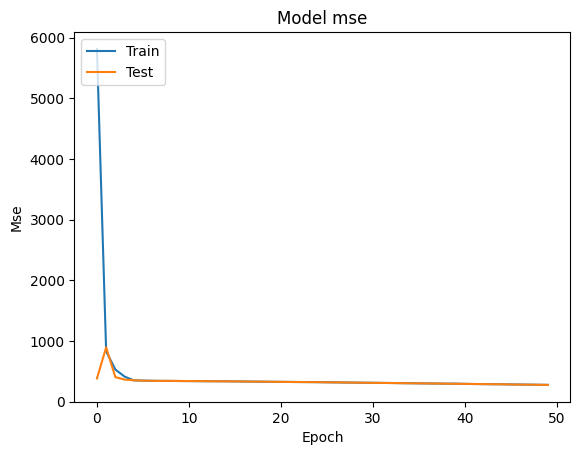

In [84]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('Mse')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

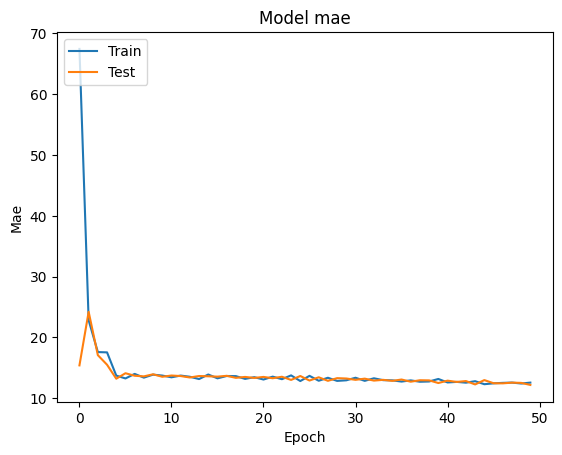

In [85]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

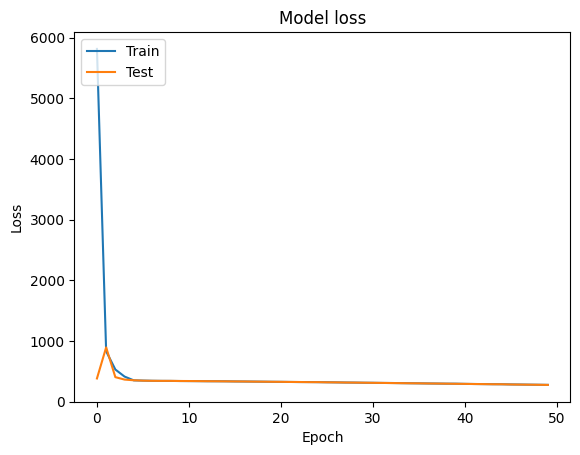

In [86]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [87]:
#Evaluate the model:-
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test,y_test_pred,squared=False)

print('Training set RMSE: %.3f, Testing set RMSE: %.3f' % (train_rmse,test_rmse))

94/94 [==============================] - 0s 1ms/step
Training set RMSE: 16.547, Testing set RMSE: 16.551


### Randomzied Search CV

In [88]:
#Building a keras regression model:-

def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

In [89]:
#Wrapping the keras model in a object:-
keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

In [90]:
#Define the search parameters:-
batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


# Create a dictionary of the parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [91]:
#Summarize the results
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -2.898885440826416
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.001, 'init': 'normal', 'epochs': 50, 'batch_size': 100, 'activation_function': 'relu'}


In [92]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])

Epoch 1/50
121/121 [==============================] - 1s 3ms/step - loss: 2323.9905 - mse: 2323.9905 - mae: 31.5117 - val_loss: 237.2280 - val_mse: 237.2280 - val_mae: 11.5672
Epoch 2/50
121/121 [==============================] - 0s 2ms/step - loss: 230.6748 - mse: 230.6748 - mae: 10.9346 - val_loss: 228.8148 - val_mse: 228.8148 - val_mae: 10.8438
Epoch 3/50
121/121 [==============================] - 0s 2ms/step - loss: 224.7898 - mse: 224.7898 - mae: 10.7562 - val_loss: 222.1591 - val_mse: 222.1591 - val_mae: 10.6687
Epoch 4/50
121/121 [==============================] - 0s 2ms/step - loss: 217.6184 - mse: 217.6184 - mae: 10.6172 - val_loss: 214.2922 - val_mse: 214.2922 - val_mae: 10.5363
Epoch 5/50
121/121 [==============================] - 0s 2ms/step - loss: 209.0452 - mse: 209.0452 - mae: 10.4124 - val_loss: 205.0870 - val_mse: 205.0870 - val_mae: 10.2674
Epoch 6/50
121/121 [==============================] - 0s 2ms/step - loss: 198.6562 - mse: 198.6562 - mae: 10.1716 - val_loss: 19

Epoch 50/50
121/121 [==============================] - 0s 2ms/step - loss: 2.4955 - mse: 2.4955 - mae: 1.1730 - val_loss: 2.3353 - val_mse: 2.3353 - val_mae: 1.1306


In [93]:
#Evaluate the model:-

y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set RMSE : %.3f, Testing set RMSE: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 1ms/step
Training set RMSE : 1.546, Testing set RMSE: 1.528


In [94]:
result=pd.DataFrame({'Models':['base model','tuned model'],'Train rmse':[train_rmse,train_rmse_tuned],
                     'Test rmse':[test_rmse,test_rmse_tuned]})
result

,Models,Train rmse,Test rmse
0,base model,16.547405,16.551157
1,tuned model,1.546160,1.528158


#### For both base model and tuned model, the difference between rmse for train and test set is very low indicating almost no overfitting.
#### For tuned model,the rmse has decreased compared to base model suggesting that hypertuning parameters has increased the efficiency of this regression model